In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np


# First, you must import the data
df = pd.read_csv(
    "C:/Users/eli/Desktop/nhanes_2015_2016.csv")

# Next, look at the 'head' of our DataFrame 'df'.
df.head(2)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN


In [66]:
# Lets only consider the feature (or variable) 'BPXSY2'
bp = df['BPXSY2']
print(bp)

0       124.0
1       140.0
2       132.0
3       134.0
4       114.0
        ...  
5730    112.0
5731    116.0
5732    146.0
5733    106.0
5734    114.0
Name: BPXSY2, Length: 5735, dtype: float64


In [67]:
# What is the mean of 'BPXSY2'?
bp_mean = np.mean(bp)
print(bp_mean)

124.78301716350497


In [70]:
# Are the excluded entirely? Are they counted as zeros? Something else? If you used a library function,
# try looking up the documentation using the code:
help(np.mean)

Help on function mean in module numpy:

mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)
    Compute the arithmetic mean along the specified axis.
    
    Returns the average of the array elements.  The average is taken over
    the flattened array by default, otherwise over the specified axis.
    `float64` intermediate and return values are used for integer inputs.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose mean is desired. If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the means are computed. The default is to
        compute the mean of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a mean is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the mean.

In [71]:
# To make sure we know that we aren't treating missing data in ways we don't want,
# lets go ahead and drop all the nans from our Series 'bp'
bp = bp.dropna()

In [72]:
# Find the: Median, Max, Min, Standard deviation, Variance
print(np.min(bp))  # min = 84.0
print(np.max(bp))  # max = 238.0
print(np.std(bp))  # std = 18.525338021233832
print(np.var(bp))  # variance = 343.1881488009719
print(np.median(bp))  # median = 122.0
print(np.mean(bp))  # mean = 124.78301716350497

84.0
238.0
18.525338021233832
343.1881488009719
122.0
124.78301716350497


In [73]:
# Using the fact that 'bp' is a pd.Series object, can use the pd.Series method diff()
# call this method by: pd.Series.diff()
diff_by_series_method = bp.diff()
# note that this returns a pd.Series object, that is, it had an index associated with it
# only want to see the values, not the index and values
print(diff_by_series_method.values)

[ nan  16.  -8. ...  30. -40.   8.]


In [74]:
# Now use the numpy library instead to find the same values
# np.diff(array)
diff_by_np_method = np.diff(bp)
diff_by_np_method  # array([ 16.,  -8.,   2., ...,  30., -40.,   8.])
# note that this returns an 'numpy.ndarray', which has no index associated with it, and therefore ignores
# the nan we get by the Series method

array([ 16.,  -8.,   2., ...,  30., -40.,   8.])

In [75]:
# We could also implement this ourselves with some looping
diff_by_me = []  # create an empty list
for i in range(len(bp.values)-1):  # iterate through the index values of bp
    # find the difference between an element and the previous element
    diff = bp.values[i+1] - bp.values[i]
    diff_by_me.append(diff)  # append to out list
np.array(diff_by_me)  # format as an np.array

array([ 16.,  -8.,   2., ...,  30., -40.,   8.])

In [76]:
# How to find the interquartile range
bp_iqr = stats.iqr(bp)
print(bp_iqr)  # 22.0

22.0


In [77]:
# Visualizing the data
# use the Series.describe() method to see some descriptive statistics of our Series 'bp'
bp.describe()  # median = 122.000000, min = 84.000000, std = 18.527012

count    5535.000000
mean      124.783017
std        18.527012
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64

[Text(0.5, 1.0, 'BPXSY2 vs Count')]

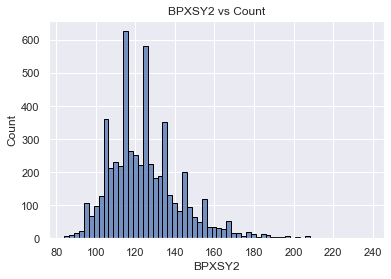

In [79]:
# Make a histogram of our 'bp' data using the seaborn library we imported as 'sns'
sns.set(style='darkgrid')
sns.histplot(data=bp, x=bp, linewidth=1, edgecolor='black').set(
    title='BPXSY2 vs Count')

[Text(0.5, 1.0, 'BPXSY2 vs Count')]

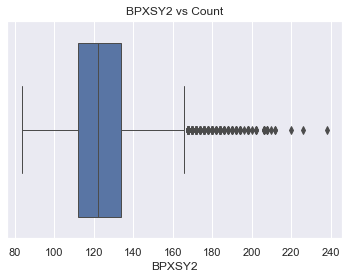

In [80]:
# Make a boxplot of our 'bp' data using the seaborn library. Make sure it has a title and labels!
sns.set(style='darkgrid')
sns.boxplot(data=bp, x=bp, linewidth=1).set(title='BPXSY2 vs Count')